In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd

import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')

__Problem Statement:__
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
- Airline: The name of the airline.
- 
- Date_of_Journey: The date of the journey
- 
- Source: The source from which the service begins.
- 
- Destination: The destination where the service ends.
- 
- Route: The route taken by the flight to reach the destination.
- 
- Dep_Time: The time when the journey starts from the source.
- 
- Arrival_Time: Time of arrival at the destination.
- 
- Duration: Total duration of the flight.
- 
- Total_Stops: Total stops between the source and destination.
- 
- Additional_Info: Additional information about the flight
- 
- Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [65]:
df_train=pd.read_excel("Data_Train.xlsx")

In [56]:
df_train.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6835,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → IDR → DEL → HYD,17:50,16:50 07 Mar,23h,2 stops,No info,20845
5046,Air India,12/05/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,07:00,01:20 13 May,18h 20m,2 stops,No info,12140
5148,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,9929
1329,Jet Airways,9/06/2019,Delhi,Cochin,DEL → JDH → BOM → COK,11:40,19:00,7h 20m,2 stops,No info,18804
6171,SpiceJet,18/05/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,4491
3129,IndiGo,24/06/2019,Delhi,Cochin,DEL → HYD → COK,07:35,16:10,8h 35m,1 stop,No info,6442
9478,IndiGo,6/05/2019,Kolkata,Banglore,CCU → HYD → BLR,19:20,23:45,4h 25m,1 stop,No info,3809
922,SpiceJet,27/03/2019,Kolkata,Banglore,CCU → BLR,22:20,00:40 28 Mar,2h 20m,non-stop,No check-in baggage included,3815
5162,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,21:10,00:05 02 Mar,2h 55m,non-stop,No info,21730
6363,SpiceJet,6/04/2019,Kolkata,Banglore,CCU → BLR,14:55,17:25,2h 30m,non-stop,No info,3873


In [57]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [58]:
df_train.shape

(10683, 11)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
df_train.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


Observations:
- There are outliers present in the Price column.
- 1/3rd of total airlines in the dataset are Jet Airways.
- Almost half of the origin airports of all flights is "Delhi"
- Almost half of the destination airports of all flights is "Cochin"
- Half of the flights journeys have only 1 layover.
- Additional_Info for the most flights is not provided or labeled as "No info".

In [17]:
for col in df_train.columns[:10]:
    print(df_train[col].value_counts())
    print("\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    15

We have now checked all categorical columns and there are no quirky unique values like "?" or blanks in any column.

In [19]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [66]:
df_train.dropna(inplace = True)

In [21]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [67]:
df_train.drop_duplicates(inplace=True)
df_train.shape

(10462, 11)

# EDA:

We can create new numerical columns to capture information from Date of Journey , Duration, Departure Time and Arrival time and gain better insights.

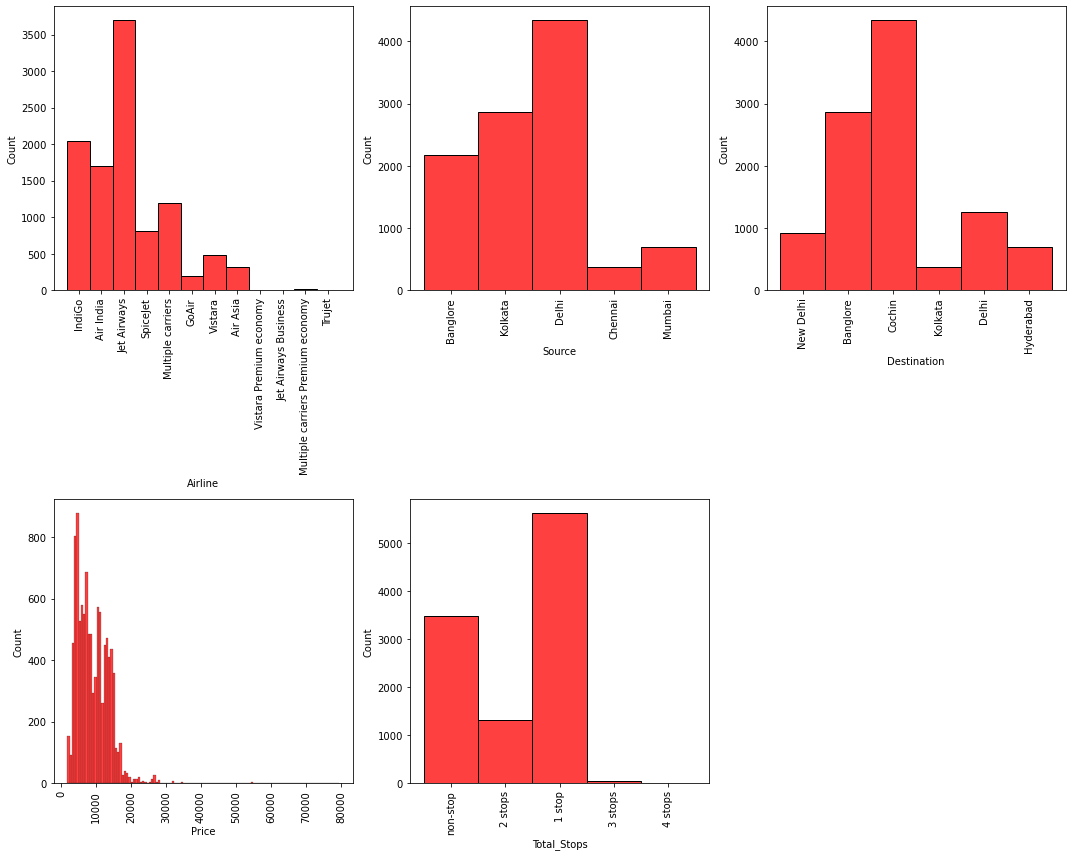

In [92]:
plt.figure(figsize=(15,12))
x=1
for i in ["Airline","Source","Destination","Price","Total_Stops"]:
    if x<=6:
        plt.subplot(2,3,x)
        sns.histplot(df_train[i],color="r",stat="count")
        plt.xticks(rotation=90)
        x+=1
plt.tight_layout()
plt.show()

Observations:
- Jet airways is the dominant airline in the dataset.
- Delhi is the most common source of flights in this dataset
- Cochin being the most frequent destination, bangalore comes in at second most.
- the price peaks around 5-7000. Almost all the prices were below 18000.
- Most of the flights included atleast 1 stop. Non stop flights came in at second. 

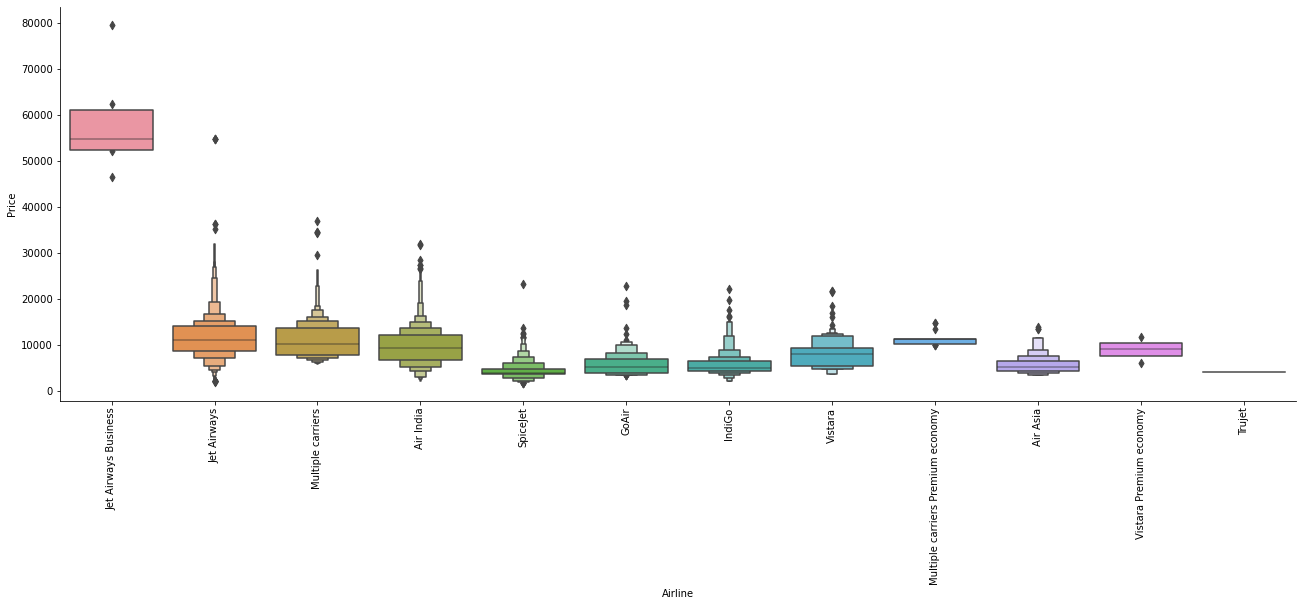

In [94]:
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.xticks(rotation=90)
plt.show()

Observation:
- A lot of airlines have outliers within them.
- Jet Airways Business, is the most expensive flight out of all which makes sense as its the business class. Even the normal jet airways flight prices are expensive than all albiet marginally.
- Air Asia and SpiceJet are the cheapest among all.

In [114]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


<Figure size 1080x504 with 0 Axes>

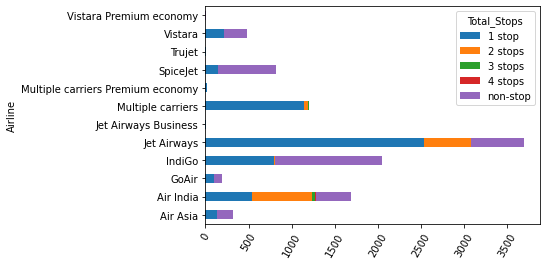

In [124]:
plt.figure(figsize=(15,7))
pd.crosstab(df_train['Airline'], df_train['Total_Stops']).plot(kind='barh', stacked=True)
plt.show()

Observation:
- SpiceJet's majority of the flights are run non-stop.
- Almost all Jet Airways flights have 1 stop. small amount are non-stop.
- Air India has the maximum number of flights with 2 stops.
- Indigo have the highest number of nonstop flights

<AxesSubplot:xlabel='Count', ylabel='Additional_Info'>

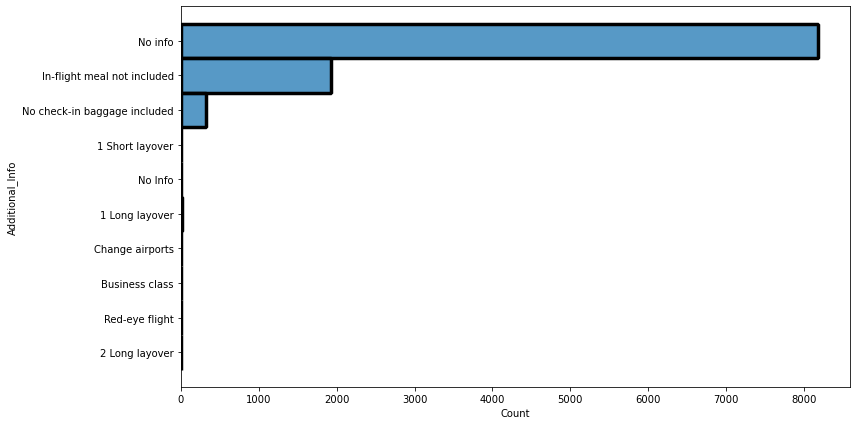

In [129]:
plt.figure(figsize=(12,7))
sns.histplot(y="Additional_Info",data=df_train)


obesrvations:
- Majority of the data is basically empty or do not provide any information.
- almost 20% of the total flights did not include any meal.
- Less than 10% of the total flights do not have any check in baggage facility.

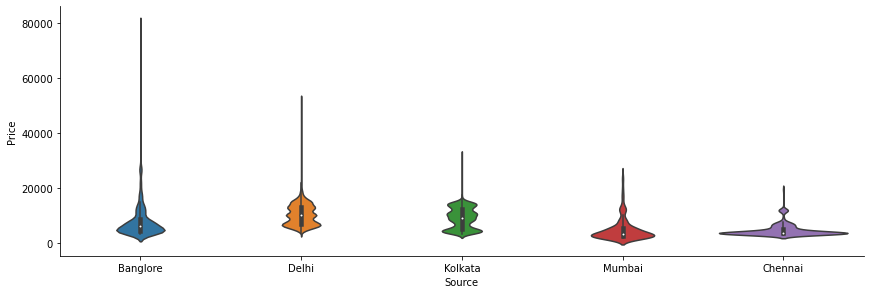

In [136]:
sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

Observation: 
- The mean price of flights originating in Delhi is higher than all the flights.
- Flights from bangalore have the highest ceiling in price per flight whereas chennai have the least.
- Majority of the flights from Kolkata falls 5k to 15k roughly.

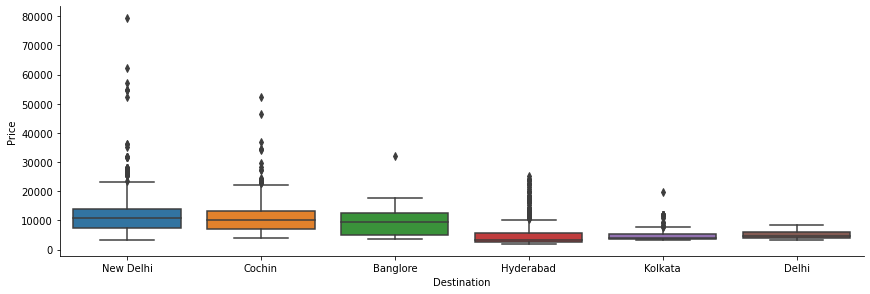

In [135]:
sns.catplot(x = "Destination", y = "Price",  data = df_train.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

Observations:
- Flights arriving in New Delhi had the highest maximum price and the mean price out of them all. Some of the enteries were probably mislabeled giving rise to another category of Delhi.
- Cochin as destination was marginally lower than New Delhi in terms of fligh Prices.
- Kolkata and Hyderabad destibations had the lowest flight prices.

## Data Transformation:

In [137]:
df_train["arr_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["arr_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train["dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train["jour_day"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day
df_train["jour_month"] = pd.to_datetime(df_train.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [138]:
df_train.drop("Date_of_Journey", axis = 1, inplace = True)
df_train.drop("Dep_Time", axis = 1, inplace = True)
df_train.drop("Arrival_Time", axis = 1, inplace = True)

In [139]:
df_train.shape

(10462, 14)

In [140]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,arr_hour,arr_min,dep_hour,dep_min,jour_day,jour_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,1,10,22,20,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,13,15,5,50,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,4,25,9,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,23,30,18,5,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,21,35,16,50,1,3


In [142]:
#This is the only way where i was able to extract information from duration into separate features.
hours=[]
mins=[]
dur = list(df_train["Duration"])

for i in range(len(dur)):
    # Check if duration contains only hour or mins
    if len(dur[i].split()) != 2:    
        if "h" in dur[i]:
            #adding zero minutes where only hours are present
            dur[i] = dur[i].strip() + " 0m"   
        else:
            dur[i] = "0h " + dur[i] 

for i in range(len(dur)):
    hours.append(int(dur[i].split("h")[0]))    # Extract hours from duration
    mins.append(int(dur[i].split("m")[0].split()[-1]))   # Extracts only minutes from duration

In [144]:
df_train["dur_hours"] = hours
df_train["dur_mins"] = mins

In [146]:
df_train.drop(["Duration"], axis = 1, inplace = True)

**We can also drop "Additionl_Info" as this columns is 80% filled with data sample named "No Info".**

In [148]:
df_train.drop("Additional_Info", axis = 1, inplace = True)

In [149]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Price,arr_hour,arr_min,dep_hour,dep_min,jour_day,jour_month,dur_hours,dur_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,1,10,22,20,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,13,15,5,50,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,4,25,9,25,9,6,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,23,30,18,5,12,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,21,35,16,50,1,3,4,45


In [151]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Price',
       'arr_hour', 'arr_min', 'dep_hour', 'dep_min', 'jour_day', 'jour_month',
       'dur_hours', 'dur_mins'],
      dtype='object')

In [182]:
num_df=df_train.select_dtypes(include=["number"])

### Checking Outliers:

In [183]:
z = np.abs(zscore(num_df))
z.shape

(10462, 9)

In [184]:
threshold = 3
print(np.where(z>3))

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         784,   825,   935,   945,   958,   965,   968,   974,  1065,
        1111,  1194,  1244,  1339,  1344,  1420,  1438,  1462,  1474,
        1492,  1547,  1625,  1650,  1653,  1778,  1784,  1797,  1909,
        2044,  2087,  2096,  2160,  2483,  2540,  2543,  2604,  2621,
        2627,  2640,  2677,  2701,  2904,  3010,  3088,  3231,  3372,
        3505,  3667,  3755,  3780,  3929,  3974,  4008,  4078,  4418,
        4476,  4606,  4627,  4779,  4960,  5080,  5312,  5378,  5451,
        5597,  5636,  5636,  5645,  5646,  5654,  5673,  5680,  5717,
        5789,  5864,  5884,  5916,  5988,  6014,  6240,  6247,  6332,
        6399,  6497,  6509,  6526,  6902,  7096,  7138,  7210,  7233,
        7254,  7259,  7280,  7438,  7454,  7455,  7511,  7516,  7609,
        7620,  7650,  7769,  7795,  7799,  7910,  7968,  8013,  8039,
        8285,  8288,  8326,  8345,  8409,  8467,  8470,  8489,  8561,
        8592,  8717

In [185]:
df_new=df_train[(z<3).all(axis=1)]

In [186]:
df_new.shape, df_train.shape

((10307, 14), (10462, 14))

### Checking Skewness:

In [172]:
df_new.skew()

Price         0.443444
arr_hour     -0.371946
arr_min       0.107511
dep_hour      0.099118
dep_min       0.176031
jour_day      0.115494
jour_month   -0.405383
dur_hours     0.806204
dur_mins     -0.091545
dtype: float64

Skewness is absent in the data, so no need to perfor transformation.

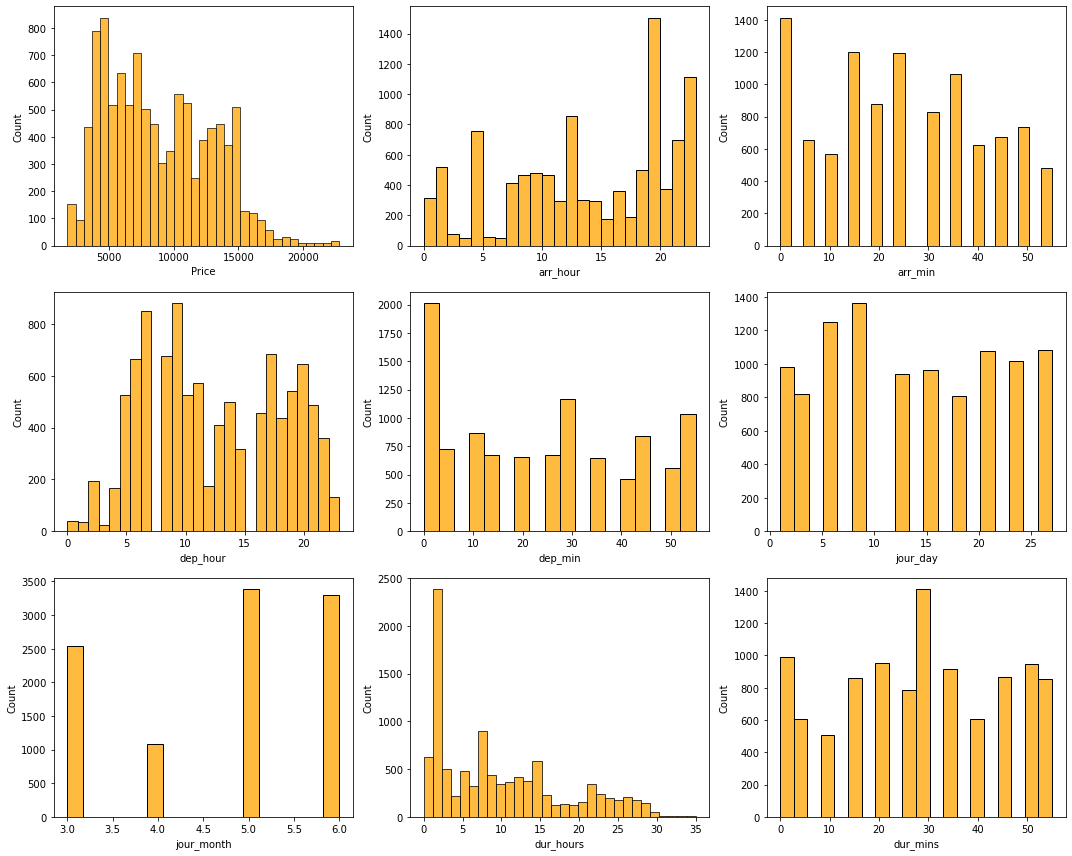

In [175]:
plt.figure(figsize=(15,12))
x=1
for i in df_train.columns[5:]:
    if x<=9:
        plt.subplot(3,3,x)
        sns.histplot(df_new[i],color="orange")
        x+=1
plt.tight_layout()
plt.show()

Observations:
- The later hours of the day was usually when the arrival peaked.
- Month of June and May were busy as its the summers and people travel more compared to March and April.
- Almost 25% of total flights in the dataset had a flight duration of less than 3.5 hours.
- Earlier days of the month areusually busier than the rest of the month.

In [176]:
df_new.describe()

,Price,arr_hour,arr_min,dep_hour,dep_min,jour_day,jour_month,dur_hours,dur_mins
count,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000
mean,8811.279907,13.368293,24.713302,12.516542,24.333463,13.561657,4.722325,9.842534,28.287086
std,4061.436006,6.855584,16.604987,5.714723,18.774482,8.430534,1.155287,8.133167,16.899388
min,1759.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,5198.000000,8.000000,10.000000,8.000000,5.000000,6.000000,4.000000,2.000000,15.000000
50%,8073.000000,14.000000,25.000000,11.000000,25.000000,12.000000,5.000000,8.000000,30.000000
75%,12199.000000,19.000000,35.000000,18.000000,40.000000,21.000000,6.000000,15.000000,45.000000
max,22798.000000,23.000000,55.000000,23.000000,55.000000,27.000000,6.000000,35.000000,55.000000


Observation: 
- Majority of the flights arrived before 7:35 pm 
- Majority of the flights departed before 6:40 pm . There were very few late night departures.
- few flights were taken after the 21st of each month.
- Average flight laster for 8.5 hours, meaning there were a lot of layover flights.

### Encoding: 

In [187]:
le=LabelEncoder()
for row in df_new.columns[0:5]:
    df_new[row] = le.fit_transform(df_new[row])    

In [188]:
df_new.head()

,Airline,Source,Destination,Route,Total_Stops,Price,arr_hour,arr_min,dep_hour,dep_min,jour_day,jour_month,dur_hours,dur_mins
0,3,0,5,18,4,3897,1,10,22,20,24,3,2,50
1,1,3,0,81,1,7662,13,15,5,50,1,5,7,25
2,4,2,1,115,1,13882,4,25,9,25,9,6,19,0
3,3,3,0,88,0,6218,23,30,18,5,12,5,5,25
4,3,0,5,29,0,13302,21,35,16,50,1,3,4,45


### Splitting dataset:

In [191]:
x=df_new.drop("Price",axis=1)
y=df_new["Price"]

### Scaling:

In [193]:
sc=StandardScaler()
xs=sc.fit_transform(x)

<AxesSubplot:>

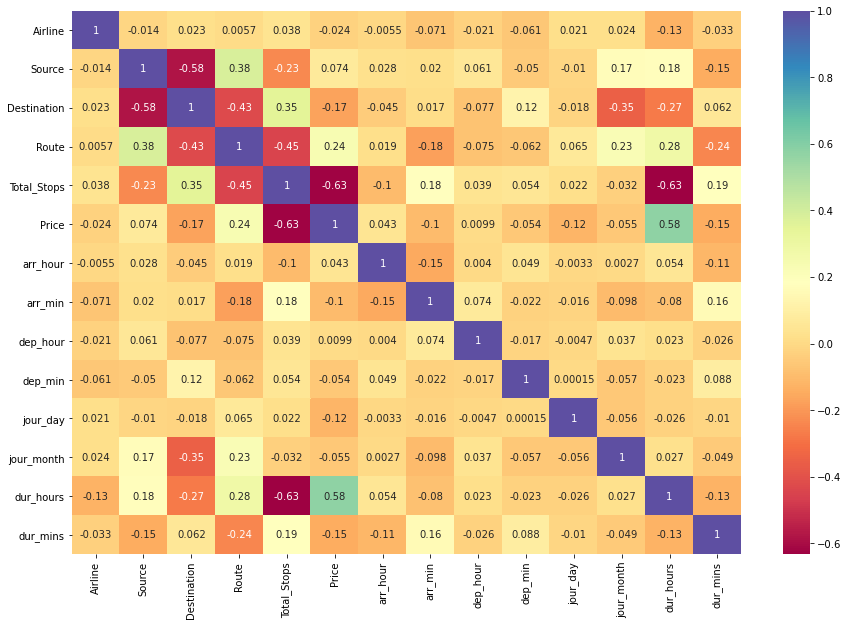

In [195]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),annot=True,cmap="Spectral")

There is no significant Multicollinearity in the numerical(includes labeled) columns. but we can still check vif to be perfectly sure.

In [200]:
vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]

In [201]:
vif

,variables,VIF
0,Airline,1.031562
1,Source,1.605053
2,Destination,1.940375
3,Route,1.577802
4,Total_Stops,2.048414
5,arr_hour,1.046405
6,arr_min,1.115071
7,dep_hour,1.032317
8,dep_min,1.033034
9,jour_day,1.017463


## Data Preprocessing:

__We have a different train and test dataset provided in the problem. We have done all the steps of the ML Pipeline on just the training set. We will create various models on the training set and save it in a pickle file so we can use it to predict on the actual test dataset provided to us.__

**We will still follow the same recipe of creating a model, but the terminology that will be used before saving basically indicates that xtrain and xtest being split from the training set - -> for the purpose of model creation.**

In [207]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(xs,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
        print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
        print("\n")

At random state 11,the training accuracy is:- 0.4720629199668982
At random state 11,the testing accuracy is:- 0.4720496644063543


At random state 28,the training accuracy is:- 0.47217846380475814
At random state 28,the testing accuracy is:- 0.47163294209829953


At random state 31,the training accuracy is:- 0.4721611628547153
At random state 31,the testing accuracy is:- 0.47227858962921543


At random state 53,the training accuracy is:- 0.4723023979199793
At random state 53,the testing accuracy is:- 0.47159123804653535


At random state 66,the training accuracy is:- 0.47232523008419325
At random state 66,the testing accuracy is:- 0.47154207885594723


At random state 82,the training accuracy is:- 0.4716392261678999
At random state 82,the testing accuracy is:- 0.4718937731148998


At random state 91,the training accuracy is:- 0.4721136308244821
At random state 91,the testing accuracy is:- 0.4722108696502929




- At random state 91,the training accuracy is:- 0.4721136308244821
- At random state 91,the testing accuracy is:- 0.4722108696502929

In [208]:
x_train, x_test,y_train, y_test=train_test_split(xs,y,test_size=.25,random_state=91)

### Model 1: Lasso Regression

In [255]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [258]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

In [259]:
lss = r2_score(y_test,pred_ls)

for k in range(2,10):
    lsscore=cross_val_score(ls,xs,y,cv=k)
    lrcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lrcv*100)
    print("r2 score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  46.892034036421606
r2 score is :  46.54898869940914


At cv=  3
Cross Val score :  47.00079394657304
r2 score is :  46.54898869940914


At cv=  4
Cross Val score :  47.02979885576118
r2 score is :  46.54898869940914


At cv=  5
Cross Val score :  46.97245692233647
r2 score is :  46.54898869940914


At cv=  6
Cross Val score :  47.00074772391427
r2 score is :  46.54898869940914


At cv=  7
Cross Val score :  46.98604007102261
r2 score is :  46.54898869940914


At cv=  8
Cross Val score :  47.046581657564026
r2 score is :  46.54898869940914


At cv=  9
Cross Val score :  47.00055251796904
r2 score is :  46.54898869940914




At cv=  5
- Cross Val score :  46.97245692233647
- r2 score is :  46.54898869940914

In [260]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ls))
print('MSE:', metrics.mean_squared_error(y_test, pred_ls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ls)))

MAE: 2338.503518559158
MSE: 8819942.186144052
RMSE: 2969.8387474986


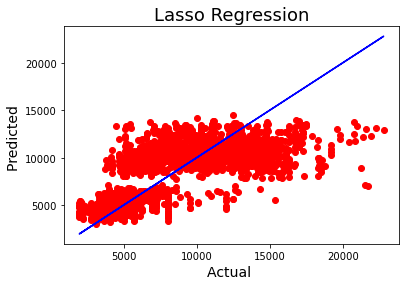

In [261]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

### Model2: Decision Tree Regressor

In [215]:
dt_reg_params = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "min_samples_split": [10, 20, 15],
              "max_depth": [5, 8, 11],
              "min_samples_leaf": [60, 40, 100],
              "max_leaf_nodes": [5,10,15]
              }
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), dt_reg_params)
grid_dt_reg.fit(x_train, y_train)

dt_reg = grid_dt_reg.best_estimator_
print("Best Estimators for Decision Tree Regression: ", grid_dt_reg.best_params_)
print("best r2 score: ",grid_dt_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'criterion': 'friedman_mse', 'max_depth': 8, 'max_leaf_nodes': 15, 'min_samples_leaf': 100, 'min_samples_split': 10}
best r2 score:  0.6829986737504471
------------------------------------------


In [216]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth= 8, max_leaf_nodes= 15, min_samples_leaf= 100, min_samples_split= 10)
dtr.fit(x_train, y_train)
pred_dtr= dtr.predict(x_test)

In [219]:
dtrr2 = r2_score(y_test,pred_dtr)

for k in range(2,10):
    dtrscore=cross_val_score(dtr,xs,y,cv=k)
    dtrcv=dtrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtrcv*100)
    print("r2 score is : ",dtrr2*100)
    print("\n")

At cv=  2
Cross Val score :  65.87980473724997
r2 score is :  67.45109554833003


At cv=  3
Cross Val score :  67.74030037473557
r2 score is :  67.45109554833003


At cv=  4
Cross Val score :  68.57742873755429
r2 score is :  67.45109554833003


At cv=  5
Cross Val score :  67.875968223677
r2 score is :  67.45109554833003


At cv=  6
Cross Val score :  67.98252101254211
r2 score is :  67.45109554833003


At cv=  7
Cross Val score :  67.57585073627575
r2 score is :  67.45109554833003


At cv=  8
Cross Val score :  68.48395359487614
r2 score is :  67.45109554833003


At cv=  9
Cross Val score :  68.04294247358924
r2 score is :  67.45109554833003




At cv=  8
- Cross Val score :  68.48395359487614
- r2 score is :  67.45109554833003

In [223]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_dtr))
print('MSE:', metrics.mean_squared_error(y_test, pred_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

MAE: 1726.6327097264098
MSE: 5370889.128207804
RMSE: 2317.5178808820015


Text(0, 0.5, 'Y Pred')

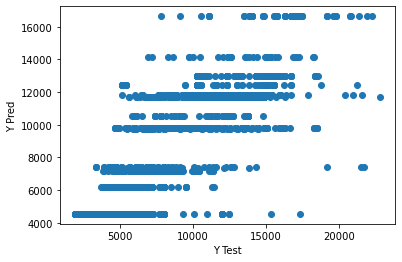

In [225]:
plt.scatter(x=y_test,y=pred_dtr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

### Model 3:Random Forest Regressor

In [230]:
rf_reg_params =  { 'max_depth': [5,7,10], "criterion": ["squared_error", "absolute_error", "poisson"],
                  'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [250,100,150,200]}
rand_rf_reg = RandomizedSearchCV(RandomForestRegressor(), rf_reg_params)

rand_rf_reg.fit(x_train, y_train)

rf_reg = rand_rf_reg.best_estimator_
# print(rf_reg)
print("Best Estimators for Decision Tree Regression: ", rand_rf_reg.best_params_)
print("best r2 score: ",rand_rf_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'poisson'}
best r2 score:  0.3862816036045249
------------------------------------------


In [231]:
rfr = RandomForestRegressor(criterion='poisson', max_depth= 10, max_features="log2",n_estimators=200)
rfr.fit(x_train, y_train)
pred_rfr= rfr.predict(x_test)

In [232]:
rfrr2 = r2_score(y_test,pred_dtr)

for k in range(2,10):
    rfrscore=cross_val_score(rfr,xs,y,cv=k)
    rfrcv=rfrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rfrcv*100)
    print("r2 score is : ",rfrr2*100)
    print("\n")

At cv=  2
Cross Val score :  37.717264785338465
r2 score is :  67.45109554833003


At cv=  3
Cross Val score :  37.804833887922854
r2 score is :  67.45109554833003


At cv=  4
Cross Val score :  37.532340079568236
r2 score is :  67.45109554833003


At cv=  5
Cross Val score :  37.801276277073804
r2 score is :  67.45109554833003


At cv=  6
Cross Val score :  38.21429697927998
r2 score is :  67.45109554833003


At cv=  7
Cross Val score :  37.652328729594316
r2 score is :  67.45109554833003


At cv=  8
Cross Val score :  36.932343648841496
r2 score is :  67.45109554833003




KeyboardInterrupt: 

At cv=  6
- Cross Val score :  38.21429697927998
- r2 score is :  67.45109554833003

In [233]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

MAE: 2729.0923721002127
MSE: 10554741.13093806
RMSE: 3248.806108547886


<AxesSubplot:xlabel='Price', ylabel='Density'>

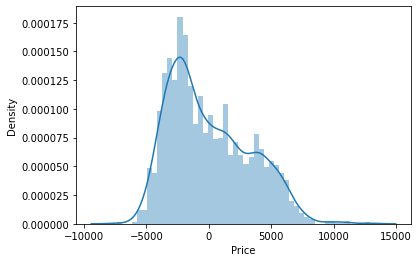

In [234]:
sns.distplot((y_test-pred_rfr),bins=50)


Text(0, 0.5, 'Y Pred')

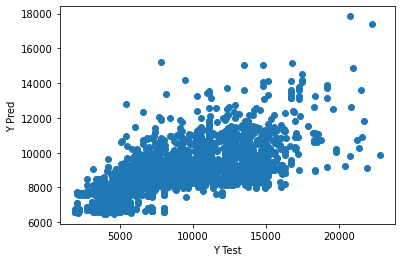

In [235]:
plt.scatter(x=y_test,y=pred_rfr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

### Model 4: XGB Regressor

In [237]:
from xgboost import XGBRegressor

In [243]:
xgb_reg_params =  {'booster' : ['gbtree','dart','gblinear'], 'importance_type' : ['gain','split'],'n_estimators' : [100,200,300],'eta' : [0.001, 0.01, 0.1]}
rand_xgb_reg = RandomizedSearchCV(XGBRegressor(), xgb_reg_params)

rand_xgb_reg.fit(x_train, y_train)

xgb_reg = rand_xgb_reg.best_estimator_
# print(rf_reg)
print("Best Estimators for Decision Tree Regression: ", rand_xgb_reg.best_params_)
print("best r2 score: ",rand_xgb_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'n_estimators': 300, 'importance_type': 'split', 'eta': 0.1, 'booster': 'dart'}
best r2 score:  0.8437606669098929
------------------------------------------


In [244]:
xgb = XGBRegressor(n_estimators= 300, importance_type= 'split', eta=0.1, booster='dart')
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)
pred_xgb = xgb.predict(x_test)

In [245]:
xgbs = r2_score(y_test,pred_xgb)
xgbs

0.8610595550809793

In [248]:
xgbs = r2_score(y_test,pred_xgb)

for k in [5,9]:
    xgbscore=cross_val_score(xgb,xs,y,cv=k)
    xgbcv=xgbscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",xgbcv*100)
    print("r2 score is : ",xgbs*100)
    print("\n")

At cv=  5
Cross Val score :  85.62445406079962
r2 score is :  86.10595550809794




KeyboardInterrupt: 

At cv=  5
- Cross Val score :  85.62445406079962
- r2 score is :  86.10595550809794
- I stopped at 5 as the process is very time consuming

In [250]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))

MAE: 1034.0274350777308
MSE: 2292653.893134756
RMSE: 1514.1512121101896


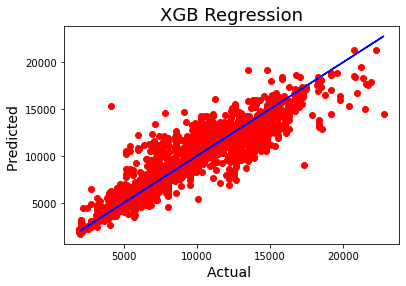

In [252]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_xgb, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('XGB Regression',fontsize=18)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

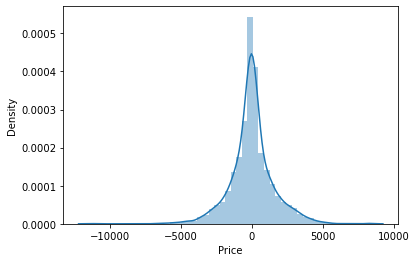

In [253]:
sns.distplot((y_test-pred_xgb),bins=50)


### Saving Model:

In [264]:
filename='Flight_price_pred_model.pickle'
pickle.dump(xgb,open(filename,'wb'))

# Prediction on the real test dataset:

We will repeat all the steps for df_test that we did for df_train, and in the end predict the price using the model we trained on training data earlier.

First, we'll have to clean the test data in the same way as training data, as the model needs the same conditions to yield an output

In [279]:
df_test=pd.read_excel('Test_set.xlsx')

In [280]:
df_test.shape

(2671, 10)

In [281]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [282]:
print("Test data Info")
print("- - - - - - - - - - - - - - - - - - - - ")
print(df_test.info())

print()
print()

print("Null values : \n")
df_test.isnull().sum()


Test data Info
- - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values : 



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [283]:
df_test["jour_day"] = pd.to_datetime(df_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
df_test["jour_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test["dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test["arr_hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["arr_min"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute

df_test.drop(["Arrival_Time"], axis = 1, inplace = True)
df_test.drop(["Dep_Time"], axis = 1, inplace = True)
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

dur = list(df_test["Duration"])
for i in range(len(dur)):
    if len(dur[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur[i] = "0h " + dur[i]           # Adds 0 hour

hours = []
mins = []
for i in range(len(dur)):
    hours.append(int(dur[i].split(sep = "h")[0]))    # Extract hours from duration
    mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
df_test["dur_hours"] = hours
df_test["dur_mins"] = mins
df_test.drop(["Duration"], axis = 1, inplace = True)

In [297]:
df_test.drop(["Additional_Info"], axis = 1, inplace = True)
# this columns as mentioned before consists of a single value "No_info" for almost 85% of the column, so it would be a good decision to drop it.

In [298]:
df_test.sample()

,Airline,Source,Destination,Route,Total_Stops,jour_day,jour_month,dep_hour,dep_min,arr_hour,arr_min,dur_hours,dur_mins
1875,GoAir,Banglore,Delhi,BLR → DEL,non-stop,9,5,20,55,23,40,2,45


In [299]:
df_test.dtypes

Airline        object
Source         object
Destination    object
Route          object
Total_Stops    object
jour_day        int64
jour_month      int64
dep_hour        int64
dep_min         int64
arr_hour        int64
arr_min         int64
dur_hours       int64
dur_mins        int64
dtype: object

In [300]:
df_test.describe(include='all')

,Airline,Source,Destination,Route,Total_Stops,jour_day,jour_month,dep_hour,dep_min,arr_hour,arr_min,dur_hours,dur_mins
count,2671,2671,2671,2671,2671,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
unique,11,5,6,100,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,897,1145,1145,624,1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,12.915762,4.718458,12.603519,24.891426,13.585174,24.558218,10.189068,28.397604
std,NaN,NaN,NaN,NaN,NaN,8.260824,1.170851,5.686673,19.086522,7.040396,16.775436,8.390683,16.747651
min,NaN,NaN,NaN,NaN,NaN,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,NaN,NaN,NaN,NaN,NaN,12.000000,5.000000,12.000000,25.000000,15.000000,25.000000,8.000000,30.000000
75%,NaN,NaN,NaN,NaN,NaN,21.000000,6.000000,18.000000,45.000000,19.000000,35.000000,15.000000,45.000000


In [302]:
for col in df_test.columns[:5]:
    print(df_test[col].value_counts())
    print("\n")

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


DEL → BOM → COK                      624
BLR → DEL                            389
CCU → BOM → BLR                      253
CCU → BLR                            172
BOM → HYD                            164
                                    ... 
CCU → DEL → COK →

No quirky categorical values present!

In [303]:
df_test_num=df_test.select_dtypes(exclude="object")

In [304]:
z=np.abs(zscore(df_test_num))
threshold=3
df_test_new=df_test[(z<3).all(axis=1)]

In [309]:
df_test.shape,df_test_new.shape

((2671, 13), (2653, 13))

In [305]:
le2=LabelEncoder()
for row in df_test_new.columns[0:5]:
    df_test_new[row] = le.fit_transform(df_test_new[row])    

In [307]:
df_test_new.sample()

,Airline,Source,Destination,Route,Total_Stops,jour_day,jour_month,dep_hour,dep_min,arr_hour,arr_min,dur_hours,dur_mins
2127,1,2,1,78,4,9,6,5,10,8,0,2,50


In [308]:
df_test_new.skew()

Airline        0.479556
Source        -0.424625
Destination    1.258283
Route         -0.275414
Total_Stops    0.667299
jour_day       0.195236
jour_month    -0.411675
dep_hour       0.083357
dep_min        0.132681
arr_hour      -0.432551
arr_min        0.110111
dur_hours      0.795392
dur_mins      -0.110629
dtype: float64

In [310]:
#We can use transformation on the feature-"Destination".
df_test_new["Destination"]=np.log1p(df_test_new["Destination"])

In [311]:
df_test_new["Destination"].skew()  # Skewness reduced

0.28133116567153743

**Now we can use our xgbregressor model to predict on this test dataset.**

In [312]:
model = open('Flight_price_pred_model.pickle','rb')
xgbreg = pickle.load(model)

In [313]:
X_test=df_test_new  #this dataset doesn't include which means this is the input dataframe that we usually consider as x.

In [321]:
pred_test = xgbreg.predict(X_test)

In [335]:
pred_test=pd.DataFrame(pred_test)

In [336]:
pred_test.to_excel("submission.xlsx", index = False)

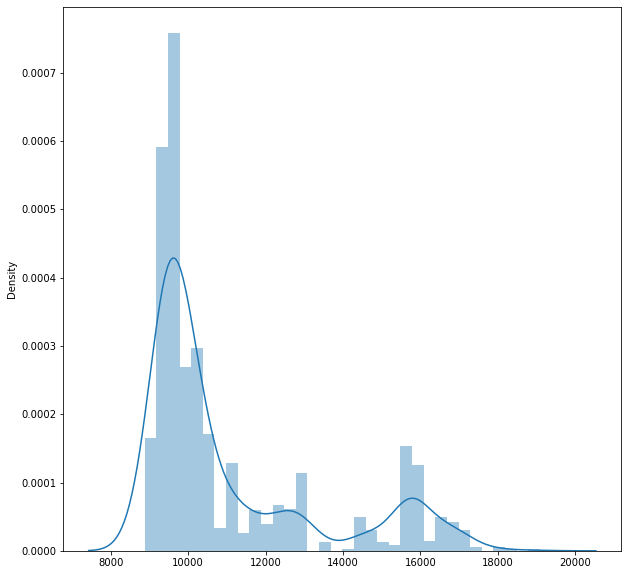

In [337]:
plt.figure(figsize = (10,10))
sns.distplot(pred_test)
plt.show()

### This depicts that our model is prediciting close to the truth as the training dataset had a mean price of around  8500 rupees